In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hongsukyi/Lectures/main/vds/vds.csv')

In [3]:
df.head(2)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84


In [4]:
df.set_index('Date', inplace=True)

In [5]:
df.head(2)

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
Date,,,,,,
2017-04-02 0:00,43,34,9,0,50.3,1.90
2017-04-02 0:05,45,32,13,0,58.9,1.84


<AxesSubplot: xlabel='Date'>

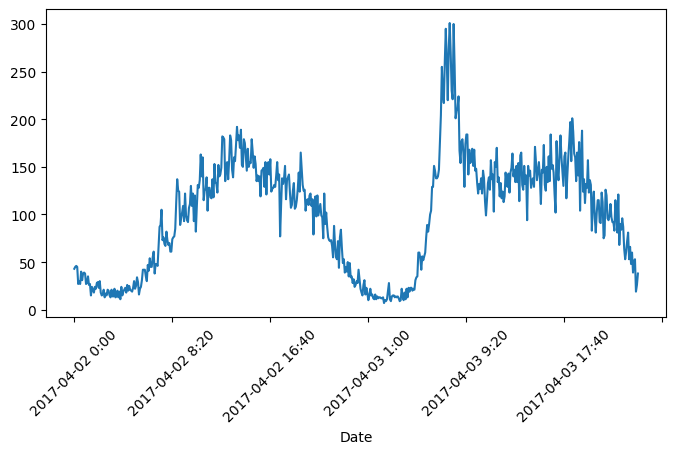

In [6]:
df['ToVol'][:576].plot(rot=45,figsize=(8,4))

<AxesSubplot: xlabel='Date'>

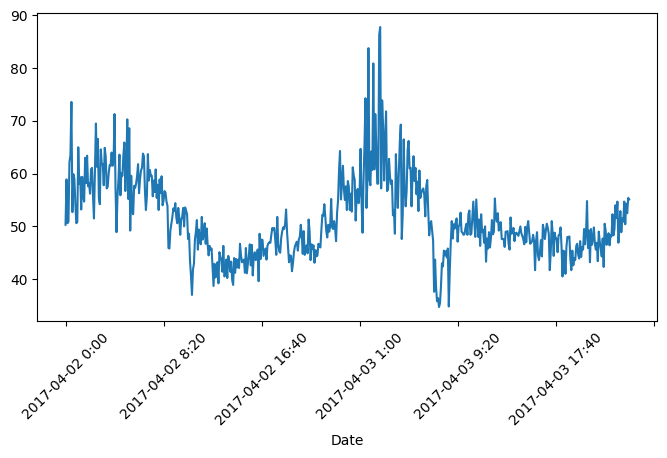

In [7]:
df['Speed'][:576].plot(rot=45,figsize=(8,4))

<AxesSubplot: xlabel='Date'>

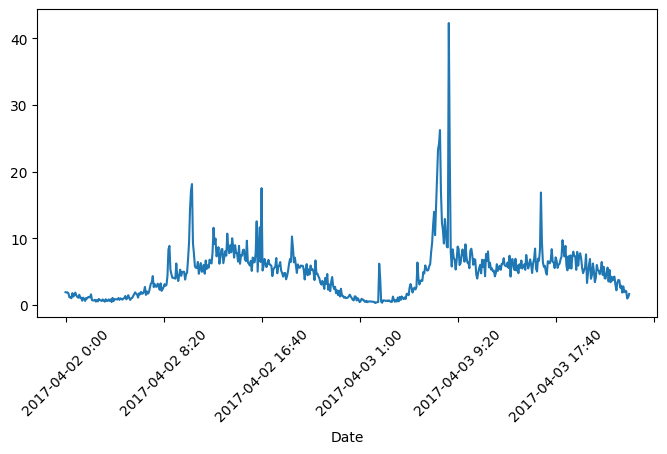

In [8]:
df['Occ.Rate'][:576].plot(rot=45,figsize=(8,4))

## 데이터 전처리를 위하여 sklearn을 사용하자

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.head(2)

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
Date,,,,,,
2017-04-02 0:00,43,34,9,0,50.3,1.90
2017-04-02 0:05,45,32,13,0,58.9,1.84


In [11]:
features = ['ToVol','LaVol','MeVol','SmVol','Occ.Rate']
X = df[features]
y = df.iloc[:,4:5].values

In [12]:
print(y)

[[50.3]
 [58.9]
 [50.6]
 ...
 [50.6]
 [59.3]
 [52.5]]


In [13]:
max_speed = y.max(); max_speed

87.8

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y)

In [15]:
print(scaled_X)
print(scaled_y)

[[0.11144578 0.         0.06206897 0.12903226 0.02039819]
 [0.11746988 0.         0.08965517 0.12096774 0.01966532]
 [0.12048193 0.         0.08275862 0.12903226 0.02003176]
 ...
 [0.07831325 0.         0.02758621 0.10483871 0.01380237]
 [0.0753012  0.         0.06896552 0.0766129  0.01429095]
 [0.09939759 0.         0.04137931 0.125      0.01844387]]
[[0.52350699]
 [0.63278272]
 [0.52731893]
 ...
 [0.52731893]
 [0.63786531]
 [0.55146125]]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, 
                                                    test_size=0.2, shuffle=False)
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(6451, 5) (6451, 1)
(1613, 5) (1613, 1)


In [17]:
print(X_train)

[[0.11144578 0.         0.06206897 0.12903226 0.02039819]
 [0.11746988 0.         0.08965517 0.12096774 0.01966532]
 [0.12048193 0.         0.08275862 0.12903226 0.02003176]
 ...
 [0.47891566 0.125      0.30344828 0.47177419 0.09368511]
 [0.51506024 0.0625     0.34482759 0.5        0.12128985]
 [0.42771084 0.25       0.29655172 0.39919355 0.07682912]]


In [18]:
X_test

array([[0.43674699, 0.125     , 0.28965517, 0.4233871 , 0.09087578],
       [0.4246988 , 0.25      , 0.36551724, 0.35483871, 0.08122633],
       [0.43975904, 0.0625    , 0.33793103, 0.40322581, 0.09930377],
       ...,
       [0.07831325, 0.        , 0.02758621, 0.10483871, 0.01380237],
       [0.0753012 , 0.        , 0.06896552, 0.0766129 , 0.01429095],
       [0.09939759, 0.        , 0.04137931, 0.125     , 0.01844387]])

In [19]:
print(X_train.shape)
print(X_train[1].shape)
num_features = len(X_train[1])
print('number of features :', num_features)

(6451, 5)
(5,)
number of features : 5


## Deep Neural Network

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
neuron_1 = 32

In [22]:
def dnn_reg1():
    model = Sequential([
        Dense(neuron_1, activation='relu', input_shape=[num_features]),
        Dense(1)
    ])    
    model.compile(optimizer='adam',loss= 'mse', metrics=['mae'])
    return model 

In [23]:
def dnn_reg2():
    model = Sequential([
        Dense(neuron_1, activation='relu', input_shape=[num_features]),
        Dense(32, activation='relu'),
        Dense(1)
    ])    
    model.compile(optimizer='adam',loss= 'mse', metrics=['mae'])
    return model 

In [24]:
def dnn_reg3():
    model = Sequential([
        Dense(neuron_1, activation='relu', input_shape=[num_features]),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])    
    model.compile(optimizer='adam',loss= 'mse', metrics=['mae'])
    return model 

In [25]:
def dnn_reg4():
    model = Sequential([
        Dense(neuron_1, activation='relu', input_shape=[num_features]),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])    
    model.compile(optimizer='adam',loss= 'mse', metrics=['mae'])
    return model 

In [26]:
model = dnn_reg1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [27]:
# !pip install livelossplot
from livelossplot import PlotLossesKeras

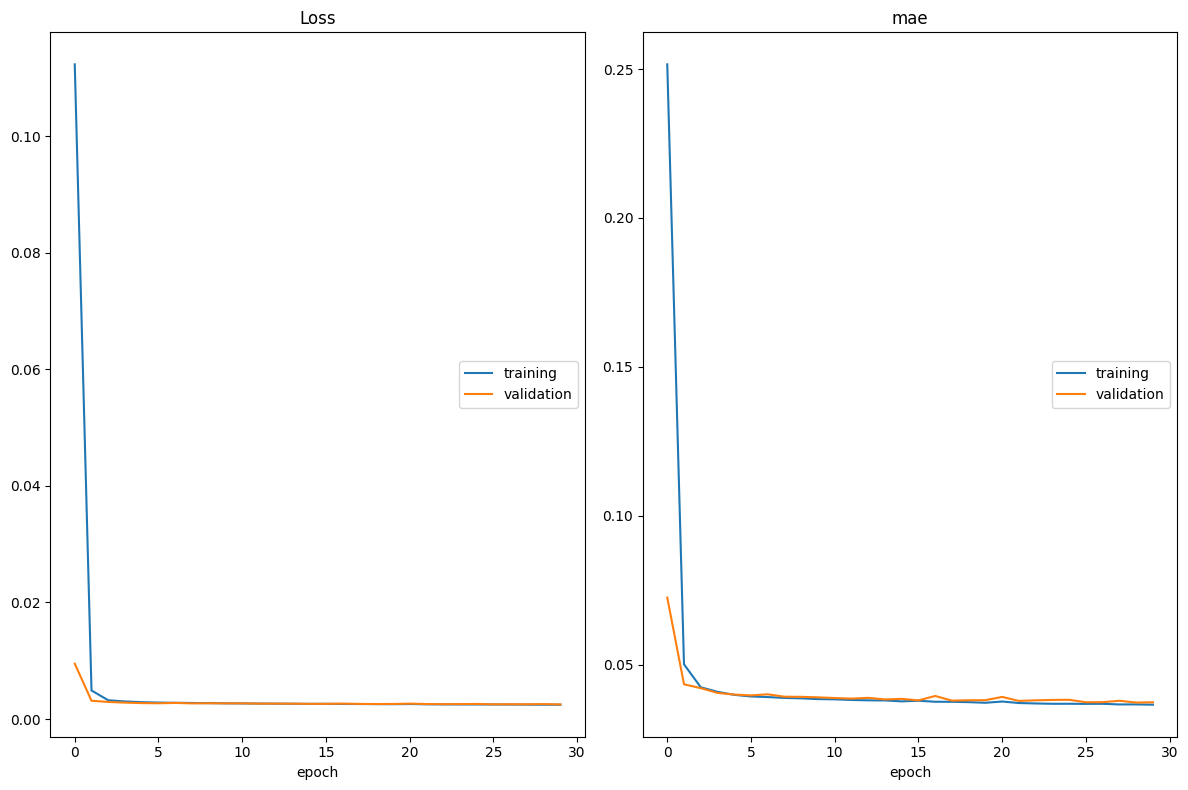

Loss
	training         	 (min:    0.002, max:    0.112, cur:    0.002)
	validation       	 (min:    0.003, max:    0.009, cur:    0.003)
mae
	training         	 (min:    0.037, max:    0.252, cur:    0.037)
	validation       	 (min:    0.037, max:    0.072, cur:    0.037)
162/162 [==============================] - 1s 6ms/step - loss: 0.0025 - mae: 0.0365 - val_loss: 0.0025 - val_mae: 0.0373


In [28]:
history = model.fit(X_train,y_train, epochs=30, validation_split=0.2, batch_size=32, callbacks=[PlotLossesKeras()])

In [29]:
# 테스트 데이터 세트로 모델 평가: Loss 값 확인 
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print("\n Neuron1={:3d},  MSE={:8.4f}, MAE={:8.4f}".format(neuron_1,mse,mae))


 Neuron1= 32,  MSE=  0.0025, MAE=  0.0362


In [30]:
# history를 이용하여 훈련과정 가시화 
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(3)

,loss,mae,val_loss,val_mae,epoch
0,0.112314,0.251584,0.009494,0.072496,0
1,0.004896,0.050076,0.003127,0.043372,1
2,0.003218,0.042370,0.002930,0.042064,2


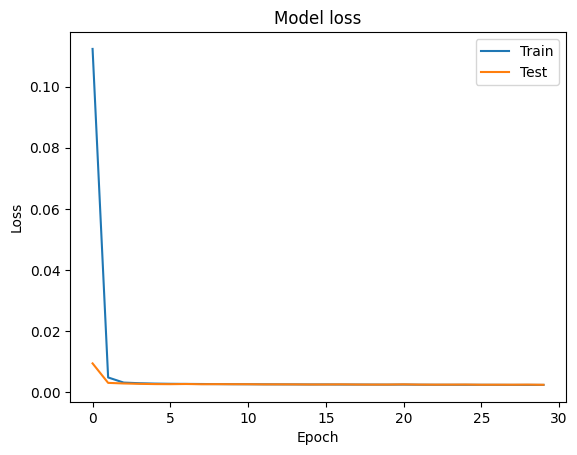

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

In [54]:
y_pred = model.predict(X_test, verbose=0)
print(y_pred.shape)

(1613, 1)


In [55]:
print('(scaled) predictions : \n', y_pred[:2])
print('\n (scaled) actural values :\n',y_test[:2])

(scaled) predictions : 
 [[0.4665929]
 [0.4981718]]

 (scaled) actural values :
 [[0.50190597]
 [0.54002541]]


In [56]:
y_inv_pred = scaler.inverse_transform(y_pred)
y_inv_test = scaler.inverse_transform(y_test)

In [57]:
print('predictions : \n', y_inv_pred[:2])
print('\nactural values :\n',y_inv_test[:2])

predictions : 
 [[45.82086]
 [48.30612]]

actural values :
 [[48.6]
 [51.6]]


In [39]:
# 가시화를 위해서 2차원을 1차원으로 
test_prediction = y_inv_pred.flatten()
test_real = y_inv_test.flatten()

Text(0, 0.5, 'Predictions [Speed]')

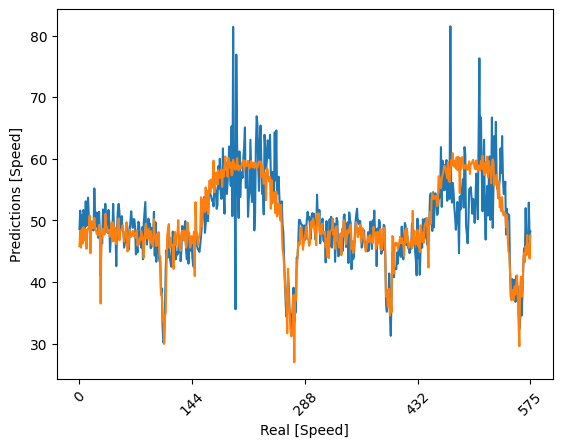

In [40]:
plt.plot(test_real[:576])
plt.plot(test_prediction[:576])
plt.xticks(rotation=45)
plt.xticks([0, 144, 288, 432,575])
plt.xlabel('Real [Speed]')
plt.ylabel('Predictions [Speed]')

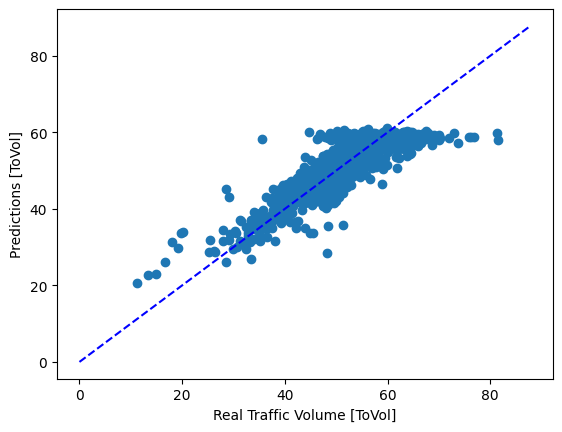

In [41]:
plt.scatter(test_real, test_prediction)
plt.xlabel('Real Traffic Volume [ToVol]')
plt.ylabel('Predictions [ToVol]')
plt.plot([0, max_speed], [0, max_speed],'b--')

Text(0, 0.5, 'Count')

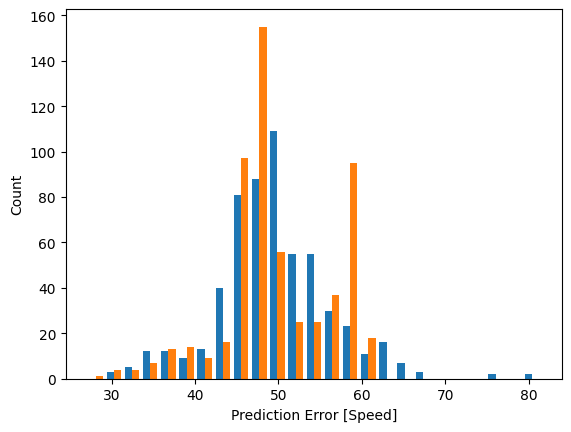

In [42]:
error = test_real[:576], test_prediction[:576]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Speed]")
plt.ylabel("Count")